<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# Tutorial 9<a id='top'></a>

- <a href='#section1'>9.1 Neural Network</a>
- <a href='#section2'>9.2 MLP for Binary Classification </a>
- <a href='#section3'>9.3 MLP for Multiclass Classification</a>
- <a href='#section4'>9.4 MLP for Regression</a>


## 9.1 Neural Network <a id='section1'></a>

### Define the Model
Defining the model requires that you first select the type of model that you need and then choose the architecture or network topology.

From an API perspective, this involves defining the layers of the model, configuring each layer with a number of nodes and activation function, and connecting the layers together into a cohesive model.

Models can be defined either with the Sequential API or the Functional API, and we will take a look at this in the next section.

In [3]:
from keras.models import Sequential
from keras.layers import Dense

unit = 100 # this value should be the number of neurons in the layer
input_shape = 100 # this value should be the number of features in your dataset

# define the model
model = Sequential()
model.add(Dense(units=unit, activation='relu', input_shape=(input_shape,)))
# Add more layers if needed using model.add()

### Compile the Model
Compiling the model requires that you first select a loss function that you want to optimize, such as mean squared error or cross-entropy.

It also requires that you select an algorithm to perform the optimization procedure, typically stochastic gradient descent, or a modern variation, such as Adam. It may also require that you select any performance metrics to keep track of during the model training process.

From an API perspective, this involves calling a function to compile the model with the chosen configuration, which will prepare the appropriate data structures required for the efficient use of the model you have defined.

The optimizer can be specified as a string for a known optimizer class, e.g. ‘sgd‘ for stochastic gradient descent, or you can configure an instance of an optimizer class and use that.

For a list of supported optimizers, see this:

- [tf.keras Optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [4]:
from keras.optimizers import SGD  # Import SGD optimizer from the keras.optimizers module

# compile the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy')

The three most common loss functions are:

- ‘binary_crossentropy‘ for binary classification.
- ‘sparse_categorical_crossentropy‘ for multi-class classification.
- ‘mse‘ (mean squared error) for regression.

In [5]:
# compile the model
model.compile(optimizer='sgd', loss='mse')

For a list of supported loss functions, see:

- [tf.keras Loss Functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

Metrics are defined as a list of strings for known metric functions or a list of functions to call to evaluate predictions.

For a list of supported metrics, see:

- [tf.keras Metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [6]:
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

### Fit the Model
Fitting the model requires that you first select the training configuration, such as the number of epochs (loops through the training dataset) and the batch size (number of samples in an epoch used to estimate model error).

Training applies the chosen optimization algorithm to minimize the chosen loss function and updates the model using the backpropagation of error algorithm.

Fitting the model is the slow part of the whole process and can take seconds to hours to days, depending on the complexity of the model, the hardware you’re using, and the size of the training dataset.

From an API perspective, this involves calling a function to perform the training process. This function will block (not return) until the training process has finished.

In [7]:
# fit the model
model.fit(X, y, epochs=100, batch_size=32)


NameError: name 'X' is not defined

For help on how to choose the batch size, see this tutorial:

- [How to Control the Stability of Training Neural Networks With the Batch Size](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)

While fitting the model, a progress bar will summarize the status of each epoch and the overall training process. This can be simplified to a simple report of model performance each epoch by setting the “verbose” argument to 2. All output can be turned off during training by setting “verbose” to 0.



In [ ]:
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

Evaluate the Model
Evaluating the model requires that you first choose a holdout dataset used to evaluate the model. This should be data not used in the training process so that we can get an unbiased estimate of the performance of the model when making predictions on new data.

The speed of model evaluation is proportional to the amount of data you want to use for the evaluation, although it is much faster than training as the model is not changed.

From an API perspective, this involves calling a function with the holdout dataset and getting a loss and perhaps other metrics that can be reported.

In [ ]:
# evaluate the model
loss = model.evaluate(X, y, verbose=0)

### Make a Prediction
Making a prediction is the final step in the life-cycle. It is why we wanted the model in the first place.

It requires you have new data for which a prediction is required, e.g. where you do not have the target values.

From an API perspective, you simply call a function to make a prediction of a class label, probability, or numerical value: whatever you designed your model to predict.

You may want to save the model and later load it to make predictions. You may also choose to fit a model on all of the available data before you start using it.

Now that we are familiar with the model life-cycle, let’s take a look at the two main ways to use the tf.keras API to build models: sequential and functional.

In [ ]:
# make a prediction
yhat = model.predict(X)

### 9.1.2 Sequential Model API


The sequential model API is the simplest and is the API that I recommend, especially when getting started.

It is referred to as “sequential” because it involves defining a Sequential class and adding layers to the model one by one in a linear manner, from input to output.

The example below defines a Sequential MLP model that accepts eight inputs, has one hidden layer with 10 nodes and then an output layer with one node to predict a numerical value.

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(10, input_shape=(8,)))
model.add(Dense(1))

Note that the visible layer of the network is defined by the “input_shape” argument on the first hidden layer. That means in the above example, the model expects the input for one sample to be a vector of eight numbers.

The sequential API is easy to use because you keep calling model.add() until you have added all of your layers.

For example, here is a deep MLP with five hidden layers.

In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define the model
model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

### 9.1.3 Functional Model API

The functional API is more complex but is also more flexible.

It involves explicitly connecting the output of one layer to the input of another layer. Each connection is specified.

First, an input layer must be defined via the Input class, and the shape of an input sample is specified. We must retain a reference to the input layer when defining the model.

In [ ]:
# define the layers
x_in = Input(shape=(8,))

Next, a fully connected layer can be connected to the input by calling the layer and passing the input layer. This will return a reference to the output connection in this new layer.

In [ ]:
x = Dense(10)(x_in)

We can then connect this to an output layer in the same manner.

In [ ]:
x_out = Dense(1)(x)

Once connected, we define a Model object and specify the input and output layers. The complete example is listed below.

In [ ]:
# example of a model defined with the functional api
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

As such, it allows for more complicated model designs, such as models that may have multiple input paths (separate vectors) and models that have multiple output paths (e.g. a word and a number).

The functional API can be a lot of fun when you get used to it.

For more on the functional API, see:

- [The Keras functional API in TensorFlow](https://www.tensorflow.org/guide/keras/functional)

<a href='#top'>jump to the top</a>

## 9.2 MLP for Binary Classification <a id='section2'></a>

We will use the Ionosphere binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

We will use a LabelEncoder to encode the string labels to integer values 0 and 1. The model will be fit on 67 percent of the data, and the remaining 33 percent will be used for evaluation, split using the train_test_split() function.

It is a good practice to use ‘relu‘ activation with a ‘he_normal‘ weight initialization. This combination goes a long way to overcome the problem of vanishing gradients when training deep neural network models.

The model predicts the probability of class 1 and uses the sigmoid activation function. The model is optimized using the adam version of stochastic gradient descent and seeks to minimize the cross-entropy loss.

The complete example is listed below.

In [8]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])

print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Test Accuracy: 0.905
1/1 [==============================] - 0s 66ms/step
Predicted: 0.999


C:\Users\kinla\AppData\Local\Temp\ipykernel_13956\2568995948.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat)


In this case, we can see that the model achieved a classification accuracy of about 90 percent and then predicted a probability of 0.9 that the one row of data belongs to class 1.

<a href='#top'>jump to the top</a>

## 9.3 MLP for Multiclass Classification <a id='section3'></a>

In machine learning, MLP refers to a multi-layer perception, which is a type of artificial neural network used for supervised learning tasks, including classification and regression.

We will use the Iris flowers multiclass classification dataset to demonstrate an MLP for multiclass classification.

This problem involves predicting the species of iris flower given measures of the flower.

Given that it is a multiclass classification, the model must have one node for each class in the output layer and use the softmax activation function. The loss function is the ‘sparse_categorical_crossentropy‘, which is appropriate for integer encoded class labels (e.g. 0 for one class, 1 for the next class, etc.)

The complete example of fitting and evaluating an MLP on the iris flowers dataset is listed below.

In [9]:
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer

y = LabelEncoder().fit_transform(y)

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))


(100, 4) (50, 4) (100,) (50,)
Test Accuracy: 0.960
1/1 [==============================] - 0s 42ms/step
Predicted: [[0.9664836  0.03008007 0.00343635]] (class=0)


In this case, we can see that the model achieved a classification accuracy of about 98 percent and then predicted a probability of a row of data belonging to each class, although class 0 has the highest probability.

<a href='#top'>jump to the top</a>

## 9.4 MLP for Regression<a id='section4'></a>

We will use the Boston housing regression dataset to demonstrate an MLP for regression predictive modeling.

This problem involves predicting house value based on properties of the house and neighborhood.

This is a regression problem that involves predicting a single numerical value. As such, the output layer has a single node and uses the default or linear activation function (no activation function). The mean squared error (mse) loss is minimized when fitting the model.

Recall that this is a regression, not classification; therefore, we cannot calculate classification accuracy.

The complete example of fitting and evaluating an MLP on the Boston housing dataset is listed below.

(339, 13) (167, 13) (339,) (167,)
input shape: 13
output shape: 189
unique labels in y_train: [ 5.6  6.3  7.   7.2  7.4  8.1  8.4  8.5  8.7  8.8  9.5  9.7 10.2 10.4
 10.5 10.8 10.9 11.  11.3 11.5 11.7 11.8 11.9 12.1 12.3 12.5 12.7 12.8
 13.1 13.2 13.3 13.4 13.5 13.6 13.8 14.  14.1 14.2 14.3 14.4 14.5 14.6
 14.9 15.  15.1 15.2 15.4 15.6 16.  16.1 16.2 16.5 16.6 16.7 16.8 17.
 17.1 17.2 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4 18.5
 18.7 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9 20.  20.1
 20.2 20.3 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2 21.4 21.5 21.6
 21.7 21.8 21.9 22.  22.2 22.4 22.5 22.6 22.7 22.8 22.9 23.  23.1 23.2
 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.3 24.4 24.5 24.6 24.7
 24.8 25.  25.1 25.2 25.3 26.2 26.4 26.5 26.6 26.7 27.1 27.5 27.9 28.
 28.2 28.4 28.5 28.6 28.7 29.1 29.6 29.8 29.9 30.1 30.3 30.8 31.1 31.2
 31.5 31.6 32.  32.2 32.5 32.7 33.  33.1 33.4 34.6 34.9 35.2 36.  36.2
 36.4 36.5 37.  37.2 37.3 37.6 37.9 38.7 39.8 41.3 42.3 

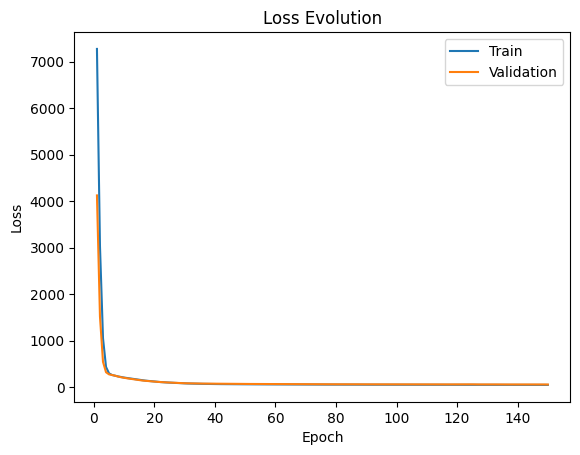

MSE: 59.066, RMSE: 7.685
1/1 [==============================] - 0s 47ms/step
Predicted: 27.657


C:\Users\kinla\AppData\Local\Temp\ipykernel_5504\725001230.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted: %.3f' % yhat)


In [6]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import History  # Import History callback
import matplotlib.pyplot as plt
import numpy as np

# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(f"input shape: {X_train.shape[1]}")
print(f"output shape: {len(np.unique(y_train))}")
print(f"unique labels in y_train: {np.unique(y_train)}")
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# Create a History callback to record loss values
history = History()
# fit the model
model.fit(X_train, y_train, epochs=150, 
          batch_size=32, verbose=0, 
          validation_data=(X_test, y_test), 
          validation_split=0.1,
          callbacks=[history],)

# evaluate the model (optional)
# Get the recorded loss values from history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the loss values
ax.plot(range(1, len(loss_values) + 1), loss_values)
ax.plot(range(1, len(val_loss_values) + 1), val_loss_values)
plt.legend(['Train', 'Validation'], loc='upper right')

# Set the plot title and labels
ax.set_title('Loss Evolution')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Show the plot
plt.show()

# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

In this case, we can see that the model achieved an MSE of about 60 which is an RMSE of about 8 (units are thousands of dollars). A value of about 26 is then predicted for the single example.

<a href='#top'>jump to the top</a>